# Introduction to Computational Modelling

In this lab you will develop a simple box model. 

Box models come up in all sorts of contexts in the geosciences. Here we will build a model of temperature evolution, which could apply for example to a rock unit near a fresh magma intrusion. The local temperature will depend on how much heat is added and removed from a volume of rock over time.

We will keep the model simple, aiming to build up a conceptual understanding of how mathematical models can be developed and applied to geological systems.

The aims of this lab are to:
* understand how a numerical model is built and implemented 
* discretise ordinary differential equations with the finite-difference method
* understand the importance of initial conditions in mathematical modelling
* create and explain graphs/figures that visualise model behaviour
* experiment with the model to understand sensitivity to different parameters
* understands concepts of transient evolution, steady state, and dynamic equilibrium
* explore the concepts of model calibration and verification

Before we get started, we need to tell python which modules we need:

In [98]:
# import some modules that we will need for numerical calculations and for plotting
# we'll shorten their names using "as" so that we don't have to type much later on

# import modules for numerical calculations and for plotting
import numpy as np
import matplotlib.pyplot as plt

# tell python to allow plotting to occur within the page
%matplotlib inline

# Customise figure style to use font size 16
from matplotlib import rcParams
rcParams['font.size'] = 16

## 1.0 A smiple box model

The simplest form of heat balance in a rock unit is akin to a storage heater which increases in temperature as heat is added by the heating element and lost to the surrounding by radiating it out.

<img src="images/concept.pdf" alt="Drawing" style="width: 600px;"/>

The processes involved in our storage heater model are heat flowing into the bathtub and out. These processes make up the rate of change our model experiences. The storage heater is thus an open system where heat can be added and removed. 

Following from the fundamental principle of energy conservation, we can write that the change in the temperature ($T$) [C] in the storage heater over some time interval ($t$) [s] is determined by the rate of heat added by the heating element $Q_{in}$ [C/s] minus the rate of heat loss to the environment $Q_{out}$ [C/s]:

\begin{equation}
\dfrac{dT(t)}{dt} = Q_{in} - Q_{out} \tag{1} \label{eq:1}
\end{equation}

This is what mathematicians call an ordinary differential equation (ODE: it only contains one derivative of time, none of space). 

___Note: always keep track of units to check for physical consistency!___

Equation \eqref{eq:1} describes the continuous evolution of temperature over time. When translating this analytical model to a numerical implementation, we need to switch from a continuous representation to a discrete one. 

Discretising an equation simply means that we divide up continuous variables such as the time, $t$, into discrete points in time $t^k$, where $k=0,1,2,...,N$ is a numbering index. We will study the discrete time interval from the initial or starting time, $t^0$, to the stopping time, $t^N$.

Here, we are using the finite-difference method, which bears its name because it approximates the infinitesimal derivative operators, $d(\dot)/dt$ with finite differences, 

\begin{equation}
    \dfrac{T(t^k) - T(t^{k-1})}{t^k - t^{k-1}} \approx \dfrac{dT(t)}{dt} \ . \tag{2} \label{eq:2}
\end{equation}

The discrete representation of \eqref{eq:1} then reads,

\begin{equation}
    {T^k - T^{k-1} \over \Delta t} = Q_{in} - Q_{out} \ , \tag{3} \label{eq:3}
\end{equation}

where we have simplified notation for convenience: $T^k = T(t^k)$ is the temperature at the discrete time $t^k$, and $\Delta t = t^k - t^{k-1}$ is the discrete time step. Generally, the smaller you make the time step the better the finite-difference approximation is, but the more time steps you will need to calculate to cover any given time period. It is a general principal in numerical modelling that there is always a trade-off between the speed of a calculation and its accuracy.

We can rearrange \eqref{eq:3} to give an explicit description of the temperature at time $t^k$, if we know the temperature at a previous time $t^{k-1}$ in the past, along with the fluxes in and out of the tub, $Q_{in}$, and $Q_{out}$,

\begin{equation}
    T^k = T^{k-1} + \left(Q_{in} - Q_{out}\right) \Delta t \ . \tag{4} \label{eq:4}
\end{equation}

This is called an explicit statement because we have only our *unknown variable* on the left-hand side, and all *known variables and model parameters* on the right-hand side. As we will see below, this model equation is quite straightforward to translate into computer code.

We now need to define a procedural model or algorithm, i.e. the sequence of steps by which this mathematical description will be implemented. We can visualise how this is going to work using a flow diagram:

<img src="images/algorithm.pdf" alt="Drawing" style="width: 600px;"/>

We will start with the simplest version of this model, where we assume that both input and output fluxes are constant. We start translating our algorithm into `Python` code by defining the initial condition for our main variable, $T^0$:

In [99]:
T0 = 10. # initial temperature of storage heater [C]

Next we define the model parameters, which in this simple version of our model are the two constant fluxes:

In [100]:
Qin  = 0.01 # rate at which heat is added to the storage heater by the heating element [C/s]
Qout = 0.01 # rate at which heat is lost to the environment by radiation [C/s]

Now we need to choose some numerical parameters to control the discrete representation of time in our simulation:

In [101]:
t     = 0.     # initial time is zero [s]
tend  = 1000.  # time to stop the simulation [s]
dt    = 10.    # length of each time step [s]
N     = (int)((tend/dt)+1) # the number of timesteps it will take to reach the defined stopping time

`Python: (int)(.)` makes sure that the result of the operation in the attached brackets is an integer number (0, 1, 2, etc.) rather than a floating point or decimal number `(float)(.)` (0.0, 0.1, 0.103485, etc.). In most situations, python figures out automatically if a variable or parameter is `float` or `int`, but here we need to make sure that the number of steps is an integer, so we tell python to do just that.

We then need to create two arrays to store the results of the model simulation as it evolves through time. The number of elements in the arrays will be the number of timesteps needed to go from starting to stopping time. 

An array is a list of numbers, like a column of values in a spreadsheet. We create arrays from the numpy library, initially containing all zero values using the function `np.zeros(N)`. We will create one array to store the discrete times $t^k$ and one to store the corresponding temperatures $T^k$:

In [102]:
Time = np.zeros(N)  # array of zeros with as many entries as time steps
Temp = np.zeros(N)  # array of zeros with as many entries as time steps

To illustrate what this has done, we will print one of the arrays to screen.

In [103]:
print(Temp)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


To run a simulation, we need to tell the computer where to start, and what operations it needs to keep repeating at every step until the stopping time is reached. For that purpose we will use a `while` loop. We give the computer a condition to test, and it will carry on repeating calculations as long as that condition remains true. The condition we will use here is `t < tend`: while the simulation time is less than the time we want our model to end, the calculations will get repeated. We will update (increment) the time `t += dt` after each step of calculation. 

In [104]:
# Initialise counting index, set initial temperature and store it in the results array
k       = 0
T       = T0
Temp[k] = T

while t < tend:
        
    # Calculate how much heat is added
    T += Qin*dt
    
    # Calculate how much heat is lost
    T -= Qout*dt
    
    # Step forward in time by adding the length of a time step
    t += dt
    
    # Step forward the index by one
    k += 1
    
    # Store updated temperature and time based on updated model
    Temp[k] = T
    Time[k] = t

A quick reminder:

`a += | -= | *= | /= b` are shorthand for adding `b` to `a` | subtracting `b` from `a` | multiplying `a` by `b` | dividing `a` by `b`; for example, 

`t += dt` 

is shorthand for 

`t = t + dt` .

## Experiment 1.1
Now we have set up the model, we can plot the results. What are your expectations for the model temperature based on the parameters we have chosen for the first simulation run?

We use commands from the `matplotlib.pyplot` (we loaded it as `plt` for short) library to create figures with plots. These should be fairly self-explanatory:

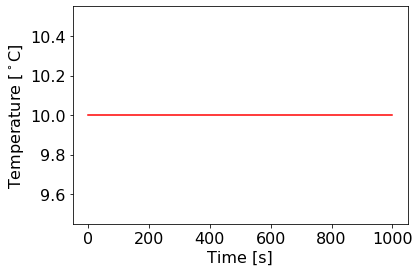

In [105]:
# plot the results with a red line
plt.plot(Time,Temp,'r-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]');

Given that we set the rate of heat input is equal to the rate of heat loss to the environment, it is not surprising that the temperature of the storage heater remains constant through time at the initial value of 10 $^\circ$C. If both componenents of the total rate of change cancel out, we consider the system to be in a state of **dynamic equilibrium**.

**What do you think will happen if we changed the rate of heat flow in or out the storage heater?**

To run further simulations more quickly and easily, we are going to rewrite the algorithm above as a **function**. The function will act as a shortcut, running the same set of instructions when calling it.

As a reminder, a function always begins with a definition, `def FunctionName(List of Arguments):`. You can give any name you find useful. You will need to state which variables and parameters you want to pass into the function (in computer lingo these are called *arguments*). Arguments are handed to the function every time it is called, as opposed to other parameters that will be *hard-coded* and can only be changed by messing with the code inside the function itself. A function definition always ends with a `return (List of Outputs)`, where you can tell which updated variables or parameters should be returned to the user once the function has done its work.

**INSTRUCTION:** find the appropriate block of code above to complete the model algorithm within the while-loop below!

In [106]:
def StorageHeater(T, Qin, Qout, tend):

    dt    = 1                   # the length of a time step
    steps = (int)((tend/dt)+1)  # the number of timesteps that will take place during a model run

    Time  = np.zeros(steps)     # array of zeros with length steps
    Temp  = np.zeros(steps)     # array of zeros with length steps
    
    # Set the initial T in the heater
    Temp[0] = T

    t = 0     # set the initial time to zero
    k = 0     # set the initial index to zero

    while t < tend:

        # Calculate how much heat is added
        T += Qin*dt

        # Calculate how much heat is lost
        T -= Qout*dt

        # Step forward in time by adding the length of a time step
        t += dt

        # Step forward the index by one
        k += 1

        # Store updated temperature and time based on updated model
        Temp[k] = T
        Time[k] = t

    # the function will return the model results when called
    return Time, Temp

Now we can ___call___ the function whenever we want to run the model and directly pass it the parameters to run the model. For example:

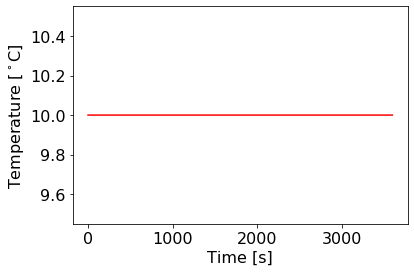

In [107]:
# define model parameters
T0   = 10.   # initial temperature [C]
Qin  = 0.1   # rate of heat input [C/s]
Qout = 0.1   # rate of heat loss [C/s]
tend = 1000  # stopping time [s]

# run the model
Time, Temp = StorageHeater(T0, Qin, Qout, tend)

# alternatively you can call the function by directly passing numbers as arguments
Time, Temp = StorageHeater(10.,0.1,0.1,3600)

# plot the results with a red line
plt.plot(Time,Temp,'r-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]');

## Experiment 1.2
**INSTRUCTION:** Explore how the model behaves for a range of different input parameters. Do so by varying the initial temperature, `T0`, the heat input, `Qin`, and output rates, `Qout`, or the stopping time, `tend` in the code block below. How does the temperature in the storage heater change through time?

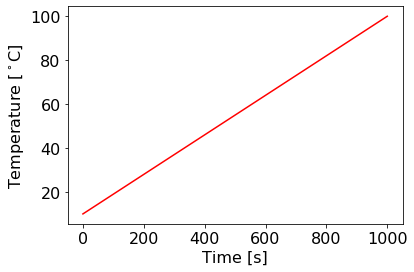

In [108]:
# => vary the values for the input parameters <=
T0   = 10  # initial temperature [C]
Qin  = 0.1  # rate of heat input [C/s]
Qout = 0.01  # rate of heat loss [C/s]
tend = 1000  # stopping time [s]

# try out the different model parameters to develop an understanding of the model response
Time, Temp = StorageHeater(T0, Qin, Qout, tend)

# plot the results with a red line
plt.plot(Time,Temp,'r-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]');

Are there any parameter choices where the model no longer behaves in a physically sensible way? What are some obvious limitations to this simplified model of heating the crust by intrusion?

## Experiment 1.3
Now that you have experimented with the model, you will have noticed one of its limitations: if $Q_{in} < Q_{out}$, and the model is run for a sufficiently long time, the temperature will reduce to values well below zero, $T < 0$. It is not physically sensible that a storage heater should loose heat indefinitely down to unreasonably low temperatures. Rather, we'd expect cooling will cease as the heater reaches the ambient temperature of the environment it is in, $T_0$.

How could we update the numerical model to reflect such a conceptual model?

The improved model should ensure that heat loss reduces and stops when the storage heater reaches ambient temperature: $Q_{out} \rightarrow 0$ if $T \rightarrow T_0$. To keep things simple, we will make the assumption that the rate of heat loss is a linear functions of the temperature differences between the heater and its environment,
    
\begin{equation}
Q_{out} = R_{out} (T-T_0) \ , \tag{5} \label{eq:5}
\end{equation}

where $R_{out}$ is a new model parameter, an *output rate factor* with units of [1/s]. When multiplied with the temperature difference, the output rate $Q_{out}$ will again have units of [C/s]. One intuitive way to understand the new parameter is that it describes the rate at which radiation and air circulation around the heater can equilibrate it to ambient temperature. Our updated (continuous) model equation now reads,

\begin{equation}
{d T(t) \over dt} = Q_{in} - R_{out} (T(t)-T_0) \ , \tag{6} \label{eq:6}
\end{equation}

and the corresponding discretised equation becomes,

\begin{equation}
T^k = T^{k-1} + \left[Q_{in} - R_{out} (T^{k-1}-T_0)\right] \Delta t \tag{7} \label{eq:7}
\end{equation}

**INSTRUCTION:** We will now create a new function that integrates this new model. To make it work you will need to complete the line where the temperature is updated using eq. \eqref{eq:7}: 

In [39]:
def UpdStorageHeater(T, Qin, Rout, tend):  # <= note you now pass in Rout instead of Qout as argument!

    dt    = 1                   # the length of a time step
    steps = (int)((tend/dt)+1)  # the number of timesteps that will take place during a model run

    Time  = np.zeros(steps)     # array of zeros with length steps
    Temp  = np.zeros(steps)     # array of zeros with length steps
    
    # Set the initial T in the heater
    Temp[0] = T

    t = 0     # set the initial time to zero
    k = 0     # set the initial index to zero

    while t < tend-dt/2:
        
        # Update T according to heat input and output rates
        T += (Qin - Rout*(T-T0))*dt # => use the formula from eq. (7) to update here <=

        # Update time by adding the length of a time step
        t += dt

        # update the index
        k += 1
        
        # Store updated solution T and time t in arrays Temp and Time
        Temp[k] = T
        Time[k] = t   
    
    # the function will return the model results when called
    return Time, Temp

**INSTRUCTION:** As above, try out different parameter combinations to see how the model responds. By now, you should have gotten the hang of it; copy and modify snippets of code from above to test the new model and plot its results.

___Hint:___ `Rout` has different units than `Qout` and will be multiplied to `(T-T0)` to calculate the rate of heat loss; consider that when choosing an appropriate range of values for `Rout`.

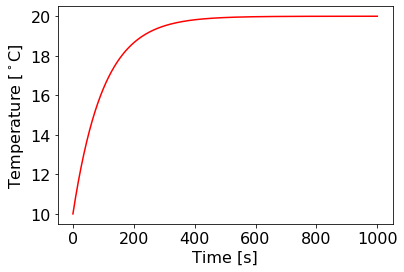

In [40]:
# => vary the values for the input parameters <=
T0   = 10    # initial temperature [C]
Qin  = 0.1   # rate of heat input [C/s]
Rout = 0.01  # rate of heat loss [C/s]
tend = 1000  # stopping time [s]

# try out the different model parameters to develop an understanding of the model response
Time, Temp = UpdStorageHeater(T0, Qin, Rout, tend)

# plot the results with a red line
plt.plot(Time,Temp,'r-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]');

Our updated model now sees the temperature rise more sharply when the heater is first 'switched on' before gradually approaching a final value that is again in **dynamic equilibrium**. This we call the **steady-state solution** of the model. 

**Can you figure out what model parameters the steady-state solution depends on?** 

**INSTRUCTION:** Investigate the model behaviour by running the model several times with different model parameters. To fully understand what is going on in this sensitivity analysis, only vary one parameter at the time while keeping all others constant. I have completed the first of three code blocks below to show you how it's done. The remaining two blocks are for you to complete.

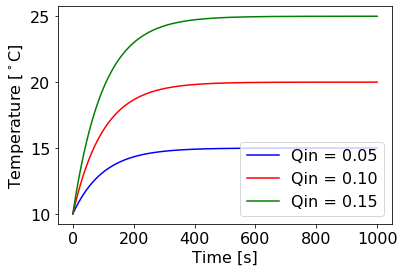

In [41]:
# run the model with different heating rates, but same initial temperature and heat loss rate factor
T0   = 10.  
Rout = 0.01
Time_Qin05, Temp_Qin05 = UpdStorageHeater(T0,0.05,Rout,1000)  # Qin = 0.05
Time_Qin10, Temp_Qin10 = UpdStorageHeater(T0,0.10,Rout,1000)  # Qin = 0.10
Time_Qin15, Temp_Qin15 = UpdStorageHeater(T0,0.15,Rout,1000)  # Qin = 0.15

# plot all the results together
plt.plot(Time_Qin05,Temp_Qin05,'b-',Time_Qin10,Temp_Qin10,'r-',Time_Qin15,Temp_Qin15,'g-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]')
plt.legend(['Qin = 0.05','Qin = 0.10','Qin = 0.15']);

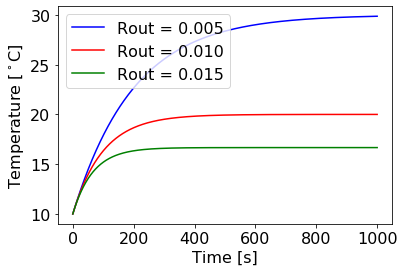

In [43]:
# run the model again with different cooling rate factors, but same initial temperature and heating rates
T0  = 10.
Qin = 0.1
Time_Rout05, Temp_Rout05 = UpdStorageHeater(T0,Qin,0.005,1000)
Time_Rout10, Temp_Rout10 = UpdStorageHeater(T0,Qin,0.010,1000)
Time_Rout15, Temp_Rout15 = UpdStorageHeater(T0,Qin,0.015,1000)

# plot all the results together
plt.plot(Time_Rout05,Temp_Rout05,'b-',Time_Rout10,Temp_Rout10,'r-',Time_Rout15,Temp_Rout15,'g-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]')
plt.legend(['Rout = 0.005','Rout = 0.010','Rout = 0.015']);

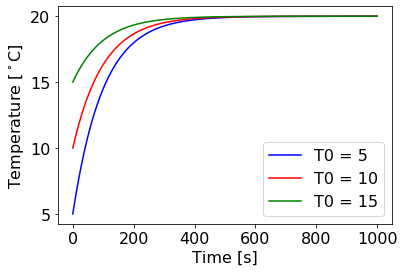

In [45]:
# run the model again with different initial temperatures, but same heat input/output parameters
Qin  = 0.1
Rout = 0.01
Time_T05, Temp_T05 = UpdStorageHeater( 5,Qin,Rout,1000)
Time_T10, Temp_T10 = UpdStorageHeater(10,Qin,Rout,1000)
Time_T15, Temp_T15 = UpdStorageHeater(15,Qin,Rout,1000)

# plot all the results together
plt.plot(Time_T05,Temp_T05,'b-',Time_T10,Temp_T10,'r-',Time_T15,Temp_T15,'g-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]')
plt.legend(['T0 = 5','T0 = 10','T0 = 15']);

From these parameter tests we can see that the steady-state solution changes when we change either heat flux parameters, but does not change when we modify the initial temperature only. This makes sense: a dynamic equilibrium is established when the input of heat from the heating element exactly balances the heat loss to the environment, no matter what temperature the heater was at before switched on.

In fact, we can directly calculate the steady-state temperature, $T = T_\infty$, based on knowing the flux parameters only. The model equation (1) expresses that the total rate of temperature change in the tub is $Q_{in} - Q_{out}$. The steady-state solution is reached when the temperature no longer changes, that is, $dT/dt = 0$; as a consequence, it must be true at steady-state that $Q_{in} = Q_{out} = R_{out} (T_\infty-T_0)$. Solving this equation for the steady-state solution, $T_\infty$, we find,

\begin{equation}
T_\infty = T_0 + {Q_{in} \over R_{out}} . \tag{8} \label{eq:8}
\end{equation}

**INSTRUCTION:** 
* Double-check the units on the right-hand side of eq. \eqref{eq:8}; are they consistent with the units of temperature $T_\infty$ on the left-hand side? 
* Confirm that eq. \eqref{eq:8} indeed correctly predicts the steady-state solution by running the model again for different initial temperatures, but with one model run using the steady-state temperature as initial value ($T_0 = T_\infty$). For the latter model run, the temperatuer should not change at all over time! Let's see if our model analysis is correct...

steady-state temperature = 20.0


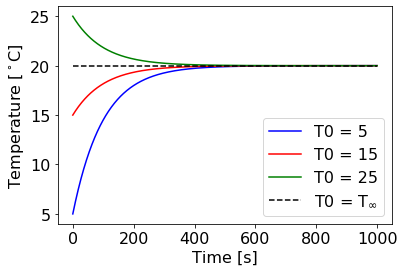

In [97]:
# calculate the steady-state solution based on our choice of flux parameters
Qin  = 0.1   # rate of heat input [C/s]
Rout = 0.01  # rate of heat loss [C/s]
Tinf = T0 + Qin/Rout
print('steady-state temperature =',Tinf)  # print steady-state for your choice of parameters

# run the model three times with different initial temperatures, but same flux parameters
Time_T05, Temp_T05 = UpdStorageHeater( 5,Qin,Rout,1000)
Time_T15, Temp_T15 = UpdStorageHeater(15,Qin,Rout,1000)
Time_T25, Temp_T25 = UpdStorageHeater(25,Qin,Rout,1000)

# run the model once more, using the steady-state temperature as initial state
Time_Tinf, Temp_Tinf = UpdStorageHeater(Tinf,Qin,Rout,1000)

# plot all the results together
plt.plot(Time_T05,Temp_T05,'b-',Time_T15,Temp_T15,'r-',Time_T25,Temp_T25,'g-',Time_Tinf,Temp_Tinf,'k--')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]')
plt.legend(['T0 = 5','T0 = 15','T0 = 25','T0 = T$_\infty$']);

## Experiment 1.3
There is another useful piece of analysis we can do on our storage heater model. Let's see what happens when comparing the following sets of flux parameters:

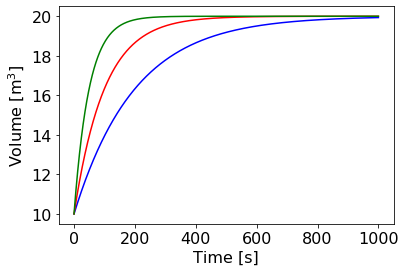

In [51]:
# run the model again with different flux parameters
Time_1, Temp_1 = UpdStorageHeater(10.,0.05,0.005,1000)
Time_2, Temp_2 = UpdStorageHeater(10.,0.10,0.010,1000)
Time_3, Temp_3 = UpdStorageHeater(10.,0.20,0.020,1000)

# plot all the results together
plt.plot(Time_1,Temp_1,'b-',Time_2,Temp_2,'r-',Time_3,Temp_3,'g-')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]');

As you can see, these three model runs produce **transient evolution curves** that all trend towards the same dynamic equilivrium at $T_\infty = 20$, but they do so at different rates. The green curve gets close to $T_\infty$ by around 250, the red by about 800, and the blue just about by 1000 seconds. 

**INSTRUCTION:** Explain by looking at the parameter choices used to produce this last plot why all three runs end on the same steady-state solution! (Hint: use 

The fact that each of the above models approaches steady-state at a different rate means that the model must inherently follow a **characteristic time scale** $t_{eq}$ that predicts over what time span the heater adjusts to its dynamic equilibrium.

It turns out that it is the heat loss rate factor we introduced above that sets the equilibration time, $t_{eq} = 1/R_{out}$. For the parameter choices above, the predicted equilibration times are $1/0.005 = 200$ for blue, $1/0.01 = 100$ for red, and $1/0.02 = 50$ for green. Comparing to the plot above, we find that the model closely approximates the steady-state solution within $\sim 5 t_{eq}$. 

Mathematically, this is because the temperature evolution of this model follows an exponential law, where $T(t) \sim \exp(-t/t_{eq})$. This law predicts that by a time of $5 t_{eq}$ the temperature will have approached $T_\infty$ by a factor $>10$ closer compared to the initial condition.

**INSTRUCTION:** Based on what we have learned now, you can now **calibrate** the model to fit a given outcome. Identify a set of parameters that will lead to a model approaching a steady-state temperature of $T_\infty = 24.15$ $^\circ$C over a characteristic time of $t_{eq} = 125$ s!

heating rate = 0.18519999999999998 
cooling rate factor = 0.008


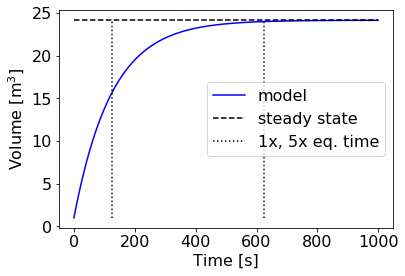

In [59]:
# set the flux parameters such that the model reaches Vss = 20 with teq = 12.5.
T0   = 1.0;     # initial temperature [m3]
Tinf = 24.15;    # given steady-state temperature [m3]
teq  = 125.;    # given equilibration time [s]
Qin  = (Tinf-T0)/teq      # fill in the appropriate formula to calibrate the influx rate given Tinf and teq 
Rout = 1/teq      # fill in the appropriate formula to calibrate the outflux rate factor given teq 
print('heating rate =',Qin,'\ncooling rate factor =',Rout)  # print calibrated parameter values

# run a simulation using your calibrated parameters
Time, Temp = UpdStorageHeater(T0,Qin,Rout,1000)

# plot all the results together to test if your calibration worked!
plt.plot(Time,Temp,'b-',[0,1000],[Tinf,Tinf],'k--',[teq,teq],[T0,Tinf],'k:',[5*teq,5*teq],[T0,Tinf],'k:')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]')
plt.legend(['model','steady state','1x, 5x eq. time']);

Note that this exercise in **model calibraton** was reasonably simple; calibration of more complex models will often be a rather involved procedure that rarely produces an exact fit to the data that constrain it.

## Experiment 1.4
An important part of model development is **verification**, often als referred to as **benchmarking**. We need to make sure that the numerical discretisation we implemented (in our example, splitting continuous physical time $t$ into discrete steps $\Delta t$) produces a good approximation to the true solution. 

To test that, we can perform a so-called **convergence test**, which involves running the model multiple times with different discrete step sizes $\Delta t$ and comparing the discrete, numerical solution to a known continuous, analytical one. If the model is implemented correctly, the approximate numerical solution should get closer to, or ___converge towards the exact solution___ as we ___reduce the discrete step size___. 

**In theory, if we reduce the discrete step to infinitesimally small size, we should recover the exact solution!**

**INSTRUCTION:** To run a convergence test, we will modify the model function in a way that lets us control the discrete time step when calling it. Below you find a mostly empty cell where you can copy-paste the contents of the `UpdStorageHeater` function and modify it so that `dt` is no longer a hard-coded parameter within, but rather gets passed into the function as an additional argument.

In [61]:
def BenchmStorageHeater(T, Qin, Rout, tend, dt):

    # fill in the appropriate snippets of code to create a modified function where dt is passed as input argument
    steps = (int)((tend/dt)+1)  # the number of timesteps that will take place during a model run

    Time  = np.zeros(steps)     # array of zeros with length steps
    Temp  = np.zeros(steps)     # array of zeros with length steps
    
    # Set the initial T in the heater
    Temp[0] = T

    t = 0     # set the initial time to zero
    k = 0     # set the initial index to zero

    while t < tend-dt/2:
        
        # Update T according to heat input and output rates
        T += (Qin - Rout*(T-T0))*dt # => use the formula from eq. (7) to update here <=

        # Update time by adding the length of a time step
        t += dt

        # update the index
        k += 1
        
        # Store updated solution T and time t in arrays Temp and Time
        Temp[k] = T
        Time[k] = t   
    
    # the function will return the model results when called
    return Time, Temp

To benchmark the model code we also need an analytical equation that expresses the exact solution to the problem. We don't have the time to go into how that is achieved, but for our present model the exact analytical solution for the temperature evolution in the storage heater is,

\begin{equation}
    T(t) = T_0 + (T_\infty - T_0) \left[1-\exp\left(-{t \over t_{eq}}\right)\right] \tag{9} \label{eq:9}
\end{equation}

On a side note, most models you would use as a geoscientist are considerably more complex than our bathtub example here. More often than not, there are no known analytical solutions to compare numerical solutions against. That is the very reason why numerical modelling is so useful! There are still ways to verify and benchmark a code without knowing the exact solution, but that is a more involved discussion we will leave for another day.

**INSTRUCTION:** Run a set of simulations with the same input parameters but using time step sizes of 8, 4, and 2 seconds. This should work a treat if you completed `BenchmStorageHeater()` correctly above.

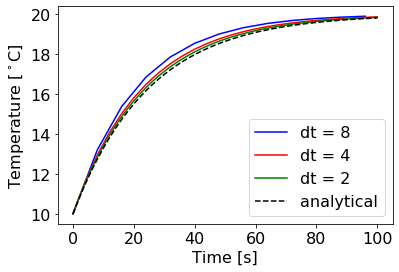

In [91]:
# set the model parameters
T0   = 10.
Qin  = 0.4
Rout = 0.04
Tinf = T0 + Qin/Rout
teq  = 1/Rout
tend = 100

# run three simulations with different time step sizes
Time_dt8, Temp_dt8 = BenchmStorageHeater(T0, Qin, Rout, tend,8)
Time_dt4, Temp_dt4 = BenchmStorageHeater(T0, Qin, Rout, tend,4)
Time_dt2, Temp_dt2 = BenchmStorageHeater(T0, Qin, Rout, tend,2)

# calculate the analytical solution coinciding with the time steps stored in Time_dt2
Temp_ana = T0 + (Tinf-T0) * (1-np.exp(-Time_dt2/teq))

# plot all the results together
plt.plot(Time_dt8,Temp_dt8,'b-',Time_dt4,Temp_dt4,'r-',Time_dt2,Temp_dt2,'g-',Time_dt2,Temp_ana,'k--')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]')
plt.legend(['dt = 8','dt = 4','dt = 2','analytical']);

Visually, we can easily convince ourselves that our bathtub model indeed converges to the analytical solution as we keep reducing `dt`. 

As a final step, we want to be a bit more rigorous and actually quantify the numerical error of our benchmark runs. We define the numerical error as the root-mean-square norm of the residuals, which are the difference between numerical and analytical solutions, $T_{num} - T_{ana}$, respectively:

\begin{equation}
    E_{rms} = \sqrt{{\sum_k \left[T^k_{num} - T^k_{ana}\right]^2 \over N}} \ , \tag{9} \label{eq:9}
\end{equation}

where $N$ is the number of time steps taken. 

**INSTRUCTION:** Let's calculate the errors of the three benchmark runs above and compare them to the size of discrete time step taken in each. The expectation for the first-order accurate discretisation we used here is that for each factor we reduce the time step, the error should be reduced by the same factor also, a trend known as linear convergence. Complete the lines of code to calculate the analytical solutions and RMS numerical errors for each time step size below:

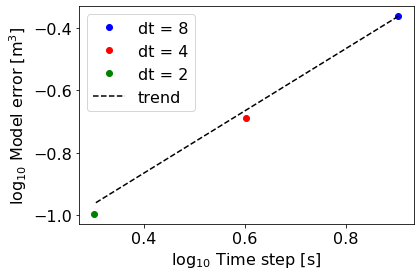

In [92]:
# Calculate the analytical solution on the same array dimensions as the three numerical solutions above
Temp_ana_dt8 = T0 + (Tinf-T0) * (1-np.exp(-Time_dt8/teq))
Temp_ana_dt4 = T0 + (Tinf-T0) * (1-np.exp(-Time_dt4/teq))
Temp_ana_dt2 = T0 + (Tinf-T0) * (1-np.exp(-Time_dt2/teq))

# Calculate the numerical error on the same array dimensions as the three numerical solutions above
E_dt8 = np.sqrt(np.sum((Temp_dt8 - Temp_ana_dt8)**2)/np.size(Temp_dt8))
E_dt4 = np.sqrt(np.sum((Temp_dt4 - Temp_ana_dt4)**2)/np.size(Temp_dt4))
E_dt2 = np.sqrt(np.sum((Temp_dt2 - Temp_ana_dt2)**2)/np.size(Temp_dt2))

# plot all the results together
plt.plot(np.log10(8),np.log10(E_dt8),'bo',np.log10(4),np.log10(E_dt4),'ro',np.log10(2),np.log10(E_dt2),'go')
plt.plot(np.log10([8,4,2]),np.log10([E_dt8/1, E_dt8/2, E_dt8/4]),'k--')
plt.xlabel('log$_{10}$ Time step [s]')
plt.ylabel('log$_{10}$ Model error [m$^3$]')
plt.legend(['dt = 8','dt = 4','dt = 2','trend']);

If all has gone well, your numerical model will show the same convergence as the theoretically expected trend (dashed line).

**If you made it all the way to the end, well done! You can officially call yourself a scientific programmer and numerical modeller now!**


## Bonus Experiment

If you haven't seen enough of our storage heater model yet, here's one more thing you can try. We have just learned from our convergence test that a first-order scheme scheme gives linear convergence. It turns out it is possible to improve model accuracy by using a second-order scheme that will give quadratic convergence. That means, for every factor we refine the time step, we get the same factor squared reduction in numerical error! 

There's several options for second-order schemes; here we introduce the so-called Crank-Nicolson scheme because of its simplicity. We first recall how we wrote the discrete model equation in (7) above,

\begin{equation}
T^k = T^{k-1} + \left[Q_{in} - R_{out} (T^{k-1}-T_0)\right] \Delta t \tag{10} \label{eq:10}
\end{equation}

Note that in this first-order scheme, we used the previous time step's temperature, $T^{k-1}$, when calculating the temperature-dependent heat loss rate. Instead, in the Crank-Nicolson scheme, we use the temperature at half a time step in the past, $T^{k-1/2} = \left(T^k + T^{k-1}\right)/2$. We substitute this modification into \eqref{eq:10} and find,

\begin{equation}
T^k = T^{k-1} + \left[ Q_{in} - R_{out} \left(\dfrac{T^k + T^{k-1}}{2} - T_0 \right) \right] \Delta t \ . \tag{11} \label{eq:11}
\end{equation}

This modified equation is somewhat problematic in that we now have the temperature to be updated, $T^k$, present on the right hand side of the equation, meaning that we would have to already know $T^k$ in order to calculate $T^k$. Clearly, that won't do. Instead, with a nifty move we can take the term containing $T^k$ over to the left hand side and write,

\begin{equation}
T^k \, \left(1 + {R_{out}\Delta t \over 2}\right) = T^{k-1} + \left[Q_{in} - {R_{out} \left({T^{k-1} \over 2} - T_0 \right)}\right] \Delta t \ . \tag{12} \label{eq:12}
\end{equation}

We can now divide both sides of the equation by $(1 + R_{out}\Delta t/2)$ and get,

\begin{equation}
T^k = {T^{k-1} + \left[Q_{in} - R_{out} \left({T^{k-1} \over 2} - T_0 \right) \right] \Delta t \over \left(1 + {R_{out}\Delta t \over 2} \right)} \ . \tag{13} \label{eq:13}
\end{equation}

Now we once again have only the unknown $T^k$ on the left hand side, and the known $T^{k-1}$ (solution of previous time step) on the right hand side of the equation. 

**INSTRUCTION:** Using code snippets from above along with \eqref{eq:13}, implement a second-order accurate version of your bathtub model!

In [93]:
def Benchm2ndStorageHeater(T, Qin, Rout, tend, dt):

    # fill in the appropriate snippets of code to create a modified function where dt is passed as input argument
    steps = (int)((tend/dt)+1)  # the number of timesteps that will take place during a model run

    Time  = np.zeros(steps)     # array of zeros with length steps
    Temp  = np.zeros(steps)     # array of zeros with length steps
    
    # Set the initial T in the heater
    Temp[0] = T

    t = 0     # set the initial time to zero
    k = 0     # set the initial index to zero

    while t < tend-dt/2:
        
        # Update T according to heat input and output rates
        T = (T + (Qin - Rout*(T/2-T0))*dt)/(1+Rout*dt/2) # => use the formula from eq. (7) to update here <=

        # Update time by adding the length of a time step
        t += dt

        # update the index
        k += 1
        
        # Store updated solution T and time t in arrays Temp and Time
        Temp[k] = T
        Time[k] = t   
    
    # the function will return the model results when called
    return Time, Temp

**INSTRUCTION:** Let's now run the same benchmark again, with the same parameter choices and same time steps as above but using your second-order model implementation now

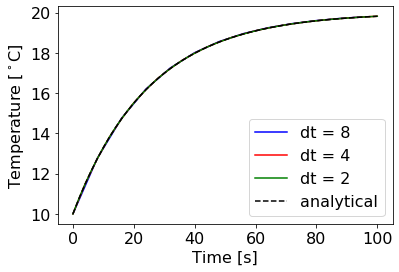

In [95]:
# run three simulations with different time step sizes
Time_dt8, Temp_dt8 = Benchm2ndStorageHeater(T0, Qin, Rout, tend,8)
Time_dt4, Temp_dt4 = Benchm2ndStorageHeater(T0, Qin, Rout, tend,4)
Time_dt2, Temp_dt2 = Benchm2ndStorageHeater(T0, Qin, Rout, tend,2)

# plot all the results together
plt.plot(Time_dt8,Temp_dt8,'b-',Time_dt4,Temp_dt4,'r-',Time_dt2,Temp_dt2,'g-',Time_dt2,Temp_ana,'k--')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [$^\circ$C]')
plt.legend(['dt = 8','dt = 4','dt = 2','analytical']);

If all worked out well, it should be apparent just from looking at the plot that the second-order scheme is much more accurate than the first-order scheme above. Practically no discrepancy should now be visible between numerical and analytical solution, even when using the same time step sizes as above. 

**INSTRUCTION:** As above, quantify the numerical error of your second-order model implementation!

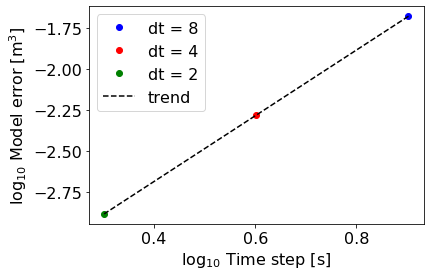

In [96]:
# Calculate the analytical solution on the same array dimensions as the three numerical solutions above
Temp_ana_dt8 = T0 + (Tinf-T0) * (1-np.exp(-Time_dt8/teq))
Temp_ana_dt4 = T0 + (Tinf-T0) * (1-np.exp(-Time_dt4/teq))
Temp_ana_dt2 = T0 + (Tinf-T0) * (1-np.exp(-Time_dt2/teq))

# Calculate the numerical error on the same array dimensions as the three numerical solutions above
E_dt8 = np.sqrt(np.sum((Temp_dt8 - Temp_ana_dt8)**2)/np.size(Temp_dt8))
E_dt4 = np.sqrt(np.sum((Temp_dt4 - Temp_ana_dt4)**2)/np.size(Temp_dt4))
E_dt2 = np.sqrt(np.sum((Temp_dt2 - Temp_ana_dt2)**2)/np.size(Temp_dt2))

# plot all the results together
plt.plot(np.log10(8),np.log10(E_dt8),'bo',np.log10(4),np.log10(E_dt4),'ro',np.log10(2),np.log10(E_dt2),'go')
plt.plot(np.log10([8,4,2]),np.log10([E_dt8/1, E_dt8/4, E_dt8/16]),'k--')
plt.xlabel('log$_{10}$ Time step [s]')
plt.ylabel('log$_{10}$ Model error [m$^3$]')
plt.legend(['dt = 8','dt = 4','dt = 2','trend']);

If you compare the RMS errors of the two time stepping schemes, it is easy to see quite how much better the second-order scheme performs. It doesn't only have more than one order of magnitude lower error at the largest time step (blue dot), but also reduces by a factor 4 in error for every factor 2 refinement of time step. 

The lesson we learn from this experiment is that numerical implementation matters! Even relatively manageable changes can sometimes produce a much more accurate model. But in the end, the only way to find out how your model performs is to **rigorously benchmark your model for verification**!